<a href="https://colab.research.google.com/github/vitovicenti/Computer-Vision-Exercises/blob/main/Computer_Vision_Exercises_3_a%2Cb%2Cc_Vicenti_Vito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Low level image processing exercises**

# **Image denoising**

* Take a synthetically noised image and a real-world noise
image

In [185]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.util import random_noise

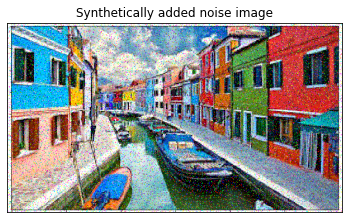

In [186]:
img = mpimg.imread('burano.png')
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
added_noise_img = random_noise(img_rgb, mode='s&p', amount=0.1)

plt.title('Synthetically added noise image', fontdict={'fontsize':12, 'color':'black'})
plt.imshow(added_noise_img)
plt.show(plt.xticks([]), plt.yticks([]))

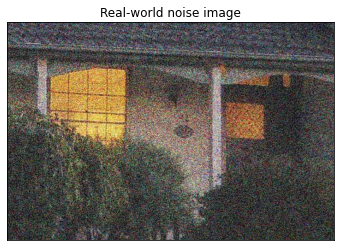

In [187]:
real_noise_img = mpimg.imread('noise.jpg')

plt.title('Real-world noise image', fontdict={'fontsize':12, 'color':'black'})
plt.imshow(real_noise_img)
plt.show(plt.xticks([]), plt.yticks([]))

* Apply proper smoothing filters to remove noise in each image

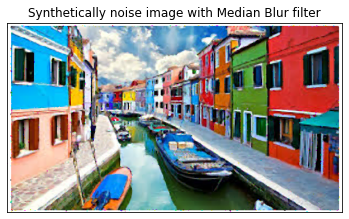

In [188]:
median_blurred_img_noise  = cv2.medianBlur(added_noise_img, 3)
plt.title('Synthetically noise image with Median Blur filter', fontdict={'fontsize':12, 'color':'black'})
plt.imshow(median_blurred_img_noise)
plt.show(plt.xticks([]), plt.yticks([]))

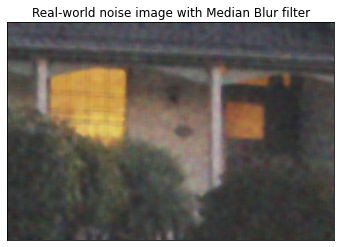

In [189]:
median_blurred_img =  cv2.medianBlur(real_noise_img, 11)
plt.title('Real-world noise image with Median Blur filter', fontdict={'fontsize':12, 'color':'black'})
plt.imshow(median_blurred_img)
plt.show(plt.xticks([]), plt.yticks([]))

# **Thresholding for segmentation**

* Load the original image, convert it to grayscale, and improve it using proper filters (e.g. Blurring filter to de-noise)

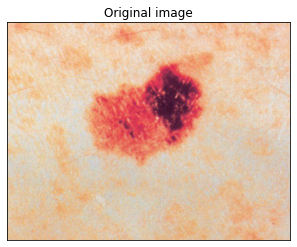

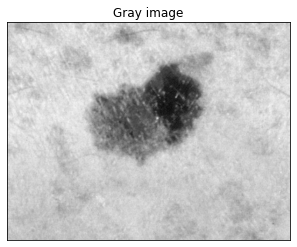

In [190]:
img1 = mpimg.imread('skin.jpeg')
imgplot = plt.imshow(img1)
plt.title('Original image', fontdict={'fontsize':12, 'color':'black'})
plt.show(plt.xticks([]), plt.yticks([])) 


gray_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap = 'gray')
plt.title('Gray image', fontdict={'fontsize':12, 'color':'black'})
plt.show(plt.xticks([]), plt.yticks([]))

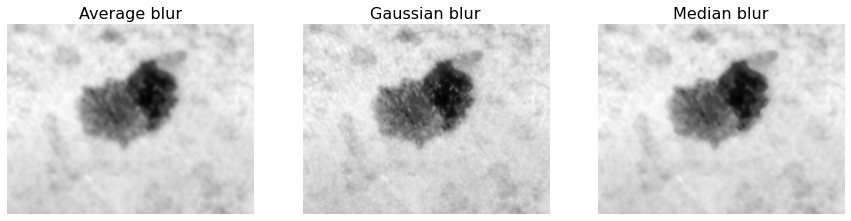

In [191]:
blurred_img = cv2.blur(gray_img, ksize = (11,11))
gaussian_blurred_img = cv2.GaussianBlur(gray_img, ksize = (11, 11), sigmaX = 0)   
median_blurred_img = cv2.medianBlur(gray_img, 11)

images = [blurred_img, gaussian_blurred_img, median_blurred_img]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 55))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
axs[0].set_title('Average blur', fontsize=16)
axs[1].set_title('Gaussian blur', fontsize=16)
axs[2].set_title('Median blur', fontsize=16)
plt.show()

* Plot the grayscale histogram of the image and try to identify what grayscale values correspond to a good threshold to separate objects (ROIs) from the background

In [192]:
def print_histogram(c, title): 
  hist,bins = np.histogram(c.flatten(), 256, [0,256])
  plt.title(title)
  plt.hist(c.flatten(), 256, [0,256], color = 'gray')
  plt.xlim([0,256])
  plt.show()

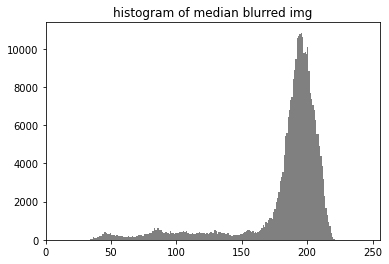

In [193]:
print_histogram(median_blurred_img, 'histogram of median blurred img')

In [194]:
def otzu_thresholding(img):

  bins_num = 256

  hist, bin_edges = np.histogram(img, bins=bins_num)

  bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

  weight1 = np.cumsum(hist)
  weight2 = np.cumsum(hist[::-1])[::-1]

  mean1 = np.cumsum(hist * bin_mids) / weight1

  mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

  inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

  index_of_max_val = np.argmax(inter_class_variance)
  threshold = bin_mids[:-1][index_of_max_val]
  return threshold

In [195]:
thr = otzu_thresholding(median_blurred_img)

print("Thresholding value found:", thr)

Thresholding value found: 142.7890625


* Apply binary thresholding and obtain the thresholded image and the binary mask

min = 33
max = 221


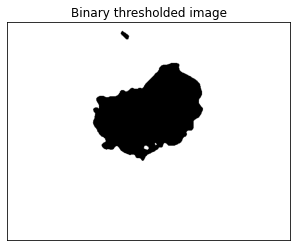

In [196]:
T=thr # thr is the thresholding value found applying Otzu's algorithm
maxval=255
minvalue=np.min(median_blurred_img)
maxvalue=np.max(median_blurred_img)
print('min =',minvalue)
print('max =',maxvalue)

th1, thr_img = cv2.threshold(median_blurred_img, T, maxval, cv2.THRESH_BINARY)

plt.title('Binary thresholded image')
plt.xticks([]),plt.yticks([])
plt.imshow(thr_img, cmap='gray')

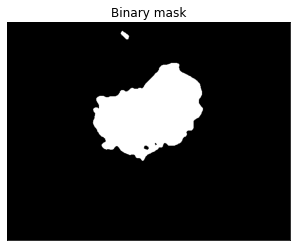

In [197]:
binary_mask = cv2.bitwise_not(thr_img)
plt.title('Binary mask')
plt.xticks([]),plt.yticks([])
plt.imshow(binary_mask, cmap="gray")

* Use the binary mask to select the ROIs of the image (apply bitwise OR)

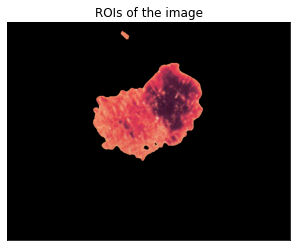

In [198]:
roi_img=cv2.bitwise_or(img1, img1, mask=binary_mask)
plt.title('ROIs of the image')
plt.xticks([]),plt.yticks([])
plt.imshow(roi_img, cmap = 'gray')

# **Edge detection**

1. Load a color image (e.g. burano image) and convert it in gray scale


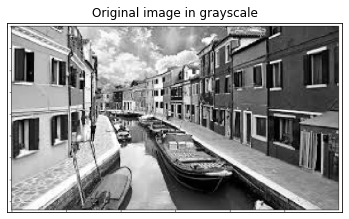

In [199]:
img = cv2.imread('burano.png')
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

plt.title('Original image in grayscale')
plt.xticks([]),plt.yticks([])
plt.imshow(img_gray, cmap = 'gray')

2. Apply the Prewitt 3x3 kernels to compute the gradient Gx and Gy

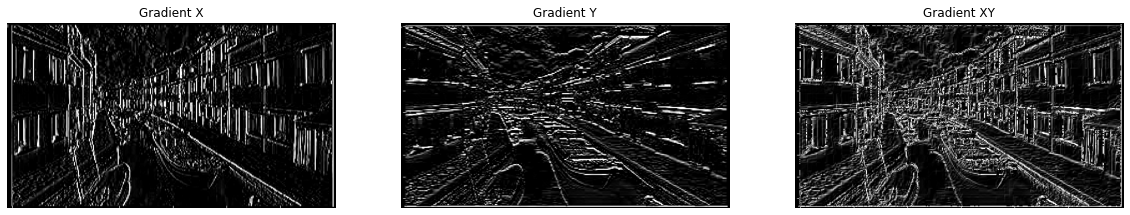

In [200]:
kernelx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
kernely = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

prewittx = cv2.filter2D(img_gray, -1, kernelx)
prewitty = cv2.filter2D(img_gray, -1, kernely)
prewittxy = prewittx + prewitty

fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))

ax1.imshow(prewittx, cmap = 'gray')
ax1.set_title('Gradient X')
ax1.set_axis_off()

ax2.imshow(prewitty, cmap = 'gray')
ax2.set_title('Gradient Y')
ax2.set_axis_off()

ax3.imshow(prewittxy,cmap = 'gray')
ax3.set_title('Gradient XY')
ax3.set_axis_off()

plt.show()

3. Apply the Sobel 3x3 kernels to compute the gradient Gx and Gy

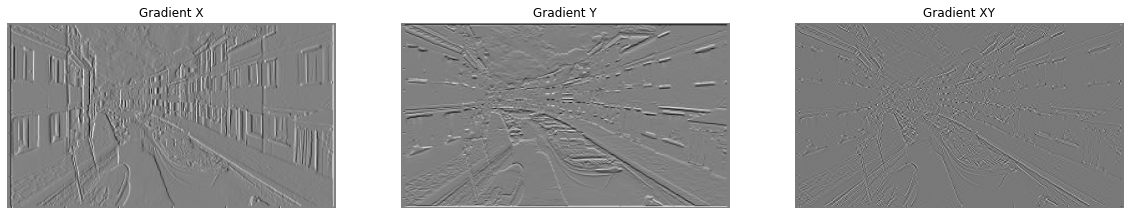

In [201]:
sobelx = cv2.Sobel(img_gray,cv2.CV_64F, dx = 1, dy = 0, ksize=3)
sobely = cv2.Sobel(img_gray,cv2.CV_64F, dx = 0, dy = 1, ksize=3)
sobelxy = cv2.Sobel(img_gray,cv2.CV_64F, dx = 1, dy = 1, ksize=3) 

fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))

ax1.imshow(sobelx, cmap = 'gray')
ax1.set_title('Gradient X')
ax1.set_axis_off()

ax2.imshow(sobely,cmap = 'gray')
ax2.set_title('Gradient Y')
ax2.set_axis_off()

ax3.imshow(sobelxy,cmap = 'gray')
ax3.set_title('Gradient XY')
ax3.set_axis_off()
plt.show()

4. Compute the gradient magnitude in both cases

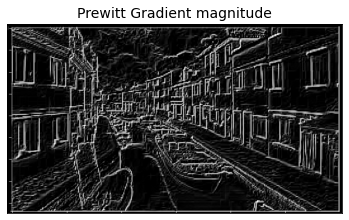

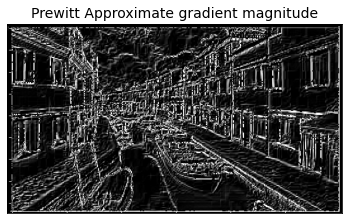

In [202]:
prewitt_grad = cv2.magnitude( prewittx.astype(np.float64), (prewitty).astype(np.float64))
plt.imshow(prewitt_grad, cmap = 'gray')
plt.title('Prewitt Gradient magnitude', fontdict={'fontsize':14})
plt.show(plt.xticks([]), plt.yticks([]))

abs_gradx = cv2.convertScaleAbs(prewittx)
abs_grady = cv2.convertScaleAbs(prewitty)
appr_prewitt_grad = abs_gradx + abs_grady

plt.title('Prewitt Approximate gradient magnitude', fontdict={'fontsize':14})
plt.imshow(appr_prewitt_grad, cmap = 'gray')
plt.show(plt.xticks([]), plt.yticks([]))  

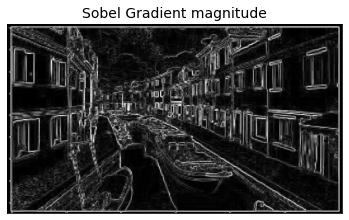

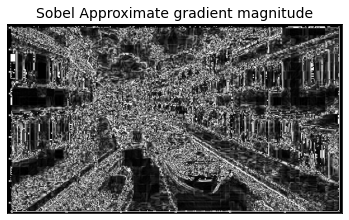

In [203]:
sobel_grad=cv2.magnitude(sobelx, sobely)
plt.imshow(sobel_grad, cmap = 'gray')
plt.title('Sobel Gradient magnitude', fontdict={'fontsize':14})
plt.show(plt.xticks([]), plt.yticks([]))

abs_gradx = cv2.convertScaleAbs(sobelx)
abs_grady = cv2.convertScaleAbs(sobely)
appr_sobel_grad = abs_gradx + abs_grady

plt.title('Sobel Approximate gradient magnitude', fontdict={'fontsize':14})
plt.imshow(appr_sobel_grad, cmap = 'gray')
plt.show(plt.xticks([]), plt.yticks([]))  

5. Apply thresholding to both gradient magnitude images to select fewer edge pixels by varying the threshold

Thresholded value found:  111.99079860628348


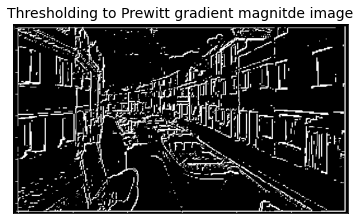

In [204]:
T1 = otzu_thresholding(prewitt_grad)

maxval=255

th1, dst1 = cv2.threshold(prewitt_grad, T, maxval, cv2.THRESH_BINARY)

plt.title('Thresholding to Prewitt gradient magnitde image', fontdict={'fontsize':14})
plt.xticks([]),plt.yticks([])
plt.imshow(dst1, cmap='gray')

print("Thresholded value found: ", T1)

Thresholded value found:  284.0461576991921


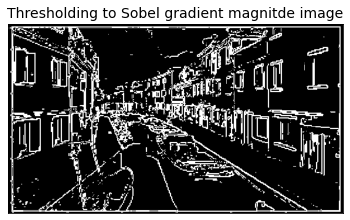

In [205]:
T2 = otzu_thresholding(sobel_grad)

maxval=255

th2, dst2 = cv2.threshold(sobel_grad, T2, maxval, cv2.THRESH_BINARY)

plt.title('Thresholding to Sobel gradient magnitde image', fontdict={'fontsize':14})
plt.xticks([]),plt.yticks([])
plt.imshow(dst2, cmap='gray')

print("Thresholded value found: ", T2)

6. Compute and show the difference between the two thresholded images

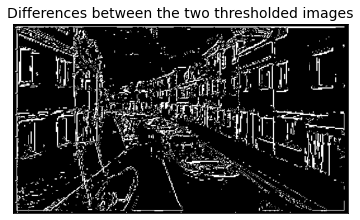

In [206]:
diff_img = cv2.absdiff(dst1, dst2)

plt.title('Differences between the two thresholded images', fontdict={'fontsize':14})
plt.xticks([]),plt.yticks([])
plt.imshow(diff_img, cmap='gray')

7. Apply the Canny edge detector to the original image and compare results

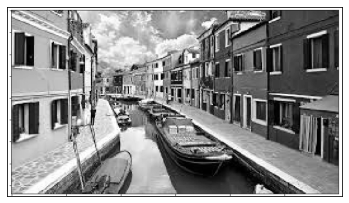

In [207]:
imgplot = plt.imshow(img_gray, cmap='gray')
plt.show(plt.xticks([]), plt.yticks([]))

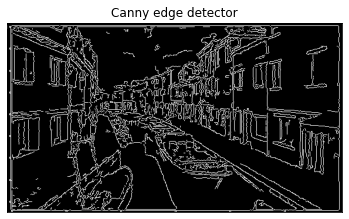

In [208]:
min_val = 200
max_val = 400

canny_img = cv2.Canny(img_gray, min_val, max_val)
imgplot = plt.imshow(canny_img, cmap='gray')
plt.title('Canny edge detector')
plt.show(plt.xticks([]), plt.yticks([]))

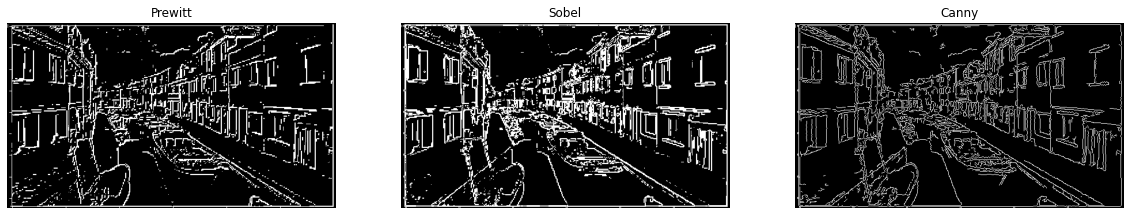

In [209]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))

ax1.imshow(dst1, cmap = 'gray')
ax1.set_title('Prewitt')
ax1.set_axis_off()

ax2.imshow(dst2,cmap = 'gray')
ax2.set_title('Sobel')
ax2.set_axis_off()

ax3.imshow(canny_img,cmap = 'gray')
ax3.set_title('Canny')
ax3.set_axis_off()
plt.show()